In [8]:
from sklearn import datasets

X, y= datasets.load_digits(return_X_y=True)
#UCIのデータを持ってきた。
# Xは文字画像の特徴行列。今回はピクセルの濃度が0(白)から16(黒)で表されている。
# ただし、1次元配列。8×8の64個のデータで一文字。それが1797文字分集められている。
print(X)
print(X.shape)
# Yは1次元配列のラベルデータ。それぞれの特徴行列が何の文字を表しているかを示している。
# この場合、0文字目の内容は0を表しているし、1797文字目は8を表している。
print(y)
y.shape

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
(1797, 64)
[0 1 2 ... 8 9 8]


(1797,)

In [19]:
# 画像として表示させるためにそれぞれの文字の特徴行列を2次元配列にする。
X0 = X[8]
print(X0)
X0_square = X0.reshape(8,8)
print(X0_square)
X0_square.shape


[ 0.  0.  9. 14.  8.  1.  0.  0.  0.  0. 12. 14. 14. 12.  0.  0.  0.  0.
  9. 10.  0. 15.  4.  0.  0.  0.  3. 16. 12. 14.  2.  0.  0.  0.  4. 16.
 16.  2.  0.  0.  0.  3. 16.  8. 10. 13.  2.  0.  0.  1. 15.  1.  3. 16.
  8.  0.  0.  0. 11. 16. 15. 11.  1.  0.]
[[ 0.  0.  9. 14.  8.  1.  0.  0.]
 [ 0.  0. 12. 14. 14. 12.  0.  0.]
 [ 0.  0.  9. 10.  0. 15.  4.  0.]
 [ 0.  0.  3. 16. 12. 14.  2.  0.]
 [ 0.  0.  4. 16. 16.  2.  0.  0.]
 [ 0.  3. 16.  8. 10. 13.  2.  0.]
 [ 0.  1. 15.  1.  3. 16.  8.  0.]
 [ 0.  0. 11. 16. 15. 11.  1.  0.]]


(8, 8)

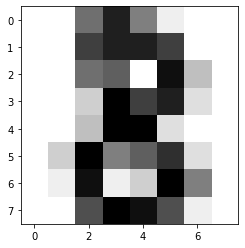

In [32]:
# 画像として表示してみる
# matplotlibのAxesオブジェクトが持ってるimshowメソッドで表示できる
from matplotlib import pyplot
fig , ax = pyplot.subplots()
ax.imshow(X0_square, cmap = 'binary')

In [33]:
# 学習を実際にさせてみる。
# ロジスティック回帰というデータの分類に用いられるアルゴリズムを用いる。
# また、学習や予測をするオブジェクトであるモデルには、
# scikit-learnのlogistic regressionというロジスティック回帰モデルを用いる。
# 教師データの学習にはモデル内のfit関数を呼び出す。
# clf.fit(x,y): clf = 学習に使うモデル, x = 教師データの特徴行列　, y = 教師データのラベルデータ

from sklearn.linear_model import LogisticRegression
# モデルの設定。このモデルは学習時に乱数を使用するため、第一引数で乱数を固定している。
# これによって結果が常に同じになる。
# パラメータの詳細はこちら:https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
clf = LogisticRegression(random_state=0 , solver='liblinear', multi_class='auto')
clf.fit(X,y)

LogisticRegression(random_state=0, solver='liblinear')

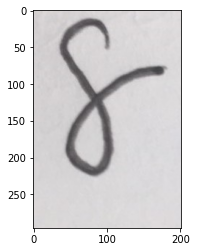

In [41]:
#教師データを学習させられたはずなので、実際のデータに対して処理を行わせてみる。
from PIL import Image

im = Image.open('pics\S__244719627.jpg')
fig , ax = pyplot.subplots()

ax.imshow(im)

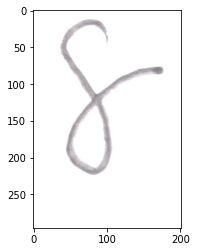

In [42]:
# 手書きデータを前処理する
fig , ax = pyplot.subplots()
from PIL import ImageEnhance
# まずは明瞭化する。
im_enhanced = ImageEnhance.Brightness(im).enhance(2.0)
ax.imshow(im_enhanced)


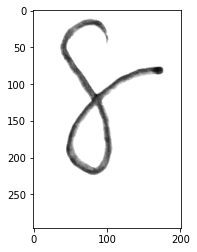

In [43]:
# 文字のグレースケール化
im_gray = im_enhanced.convert(mode= 'L')
fig, ax = pyplot.subplots()
ax.imshow(im_gray, cmap='gray')

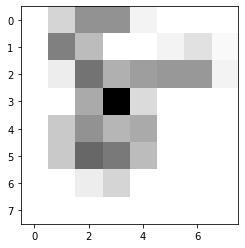

In [49]:
# 文字の縮小化8ピクセル四方に縮小！
fig, ax = pyplot.subplots()
im_8 = im_gray.resize((8, 8))
ax.imshow(im_8, cmap='gray')

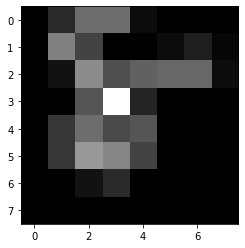

In [50]:
from PIL import ImageOps

im_inverted = ImageOps.invert(im_8)
fig , ax = pyplot.subplots()
ax.imshow(im_inverted, cmap='gray')

In [ ]:
# 前処理の終わったデータをndarrayに変換する！